<a href="https://colab.research.google.com/github/monickdallia/Segmenta-o-de-Perfil-de-Usu-rio-com-Python/blob/main/Segmenta%C3%A7%C3%A3o_de_Perfil_de_Usu%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [5]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from plotly.subplots import make_subplots
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


# Entendimento dos Dados

In [6]:
#carregando o dataframe

data = pd.read_csv('/content/drive/MyDrive/Portfólio/Projeto 04 - Segmentação de Perfil de Usuário/user_profiles_for_ads.csv')

In [7]:
#exibindo o dataframe

display(data.head())

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [8]:
#verificando informações sobre as colunas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

# Preparação dos dados

In [9]:
# verificando se há dados ausentes
print(data.isnull().sum())

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


In [10]:
#verificando se há dados duplicados
print(data.duplicated().sum())

0


# EDA (Análise Exploratória dos Dados)

In [11]:
#algumas medidas resumo do dataframe
data.describe().drop('User ID', axis=1)

,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4997.084000,251.438000,2.757500,4.601600,0.125333,0.049805,91.425000
std,2838.494365,141.941557,1.279735,2.026234,0.071187,0.028670,51.497965
min,101.000000,10.000000,0.500000,1.000000,0.000000,0.000000,5.000000
25%,2661.250000,126.000000,1.700000,2.900000,0.065000,0.026000,45.750000
50%,5002.500000,245.500000,2.800000,4.700000,0.128000,0.049000,90.000000
75%,7348.750000,377.000000,3.800000,6.400000,0.186000,0.073000,137.250000
max,9973.000000,498.000000,5.000000,8.000000,0.250000,0.100000,179.000000


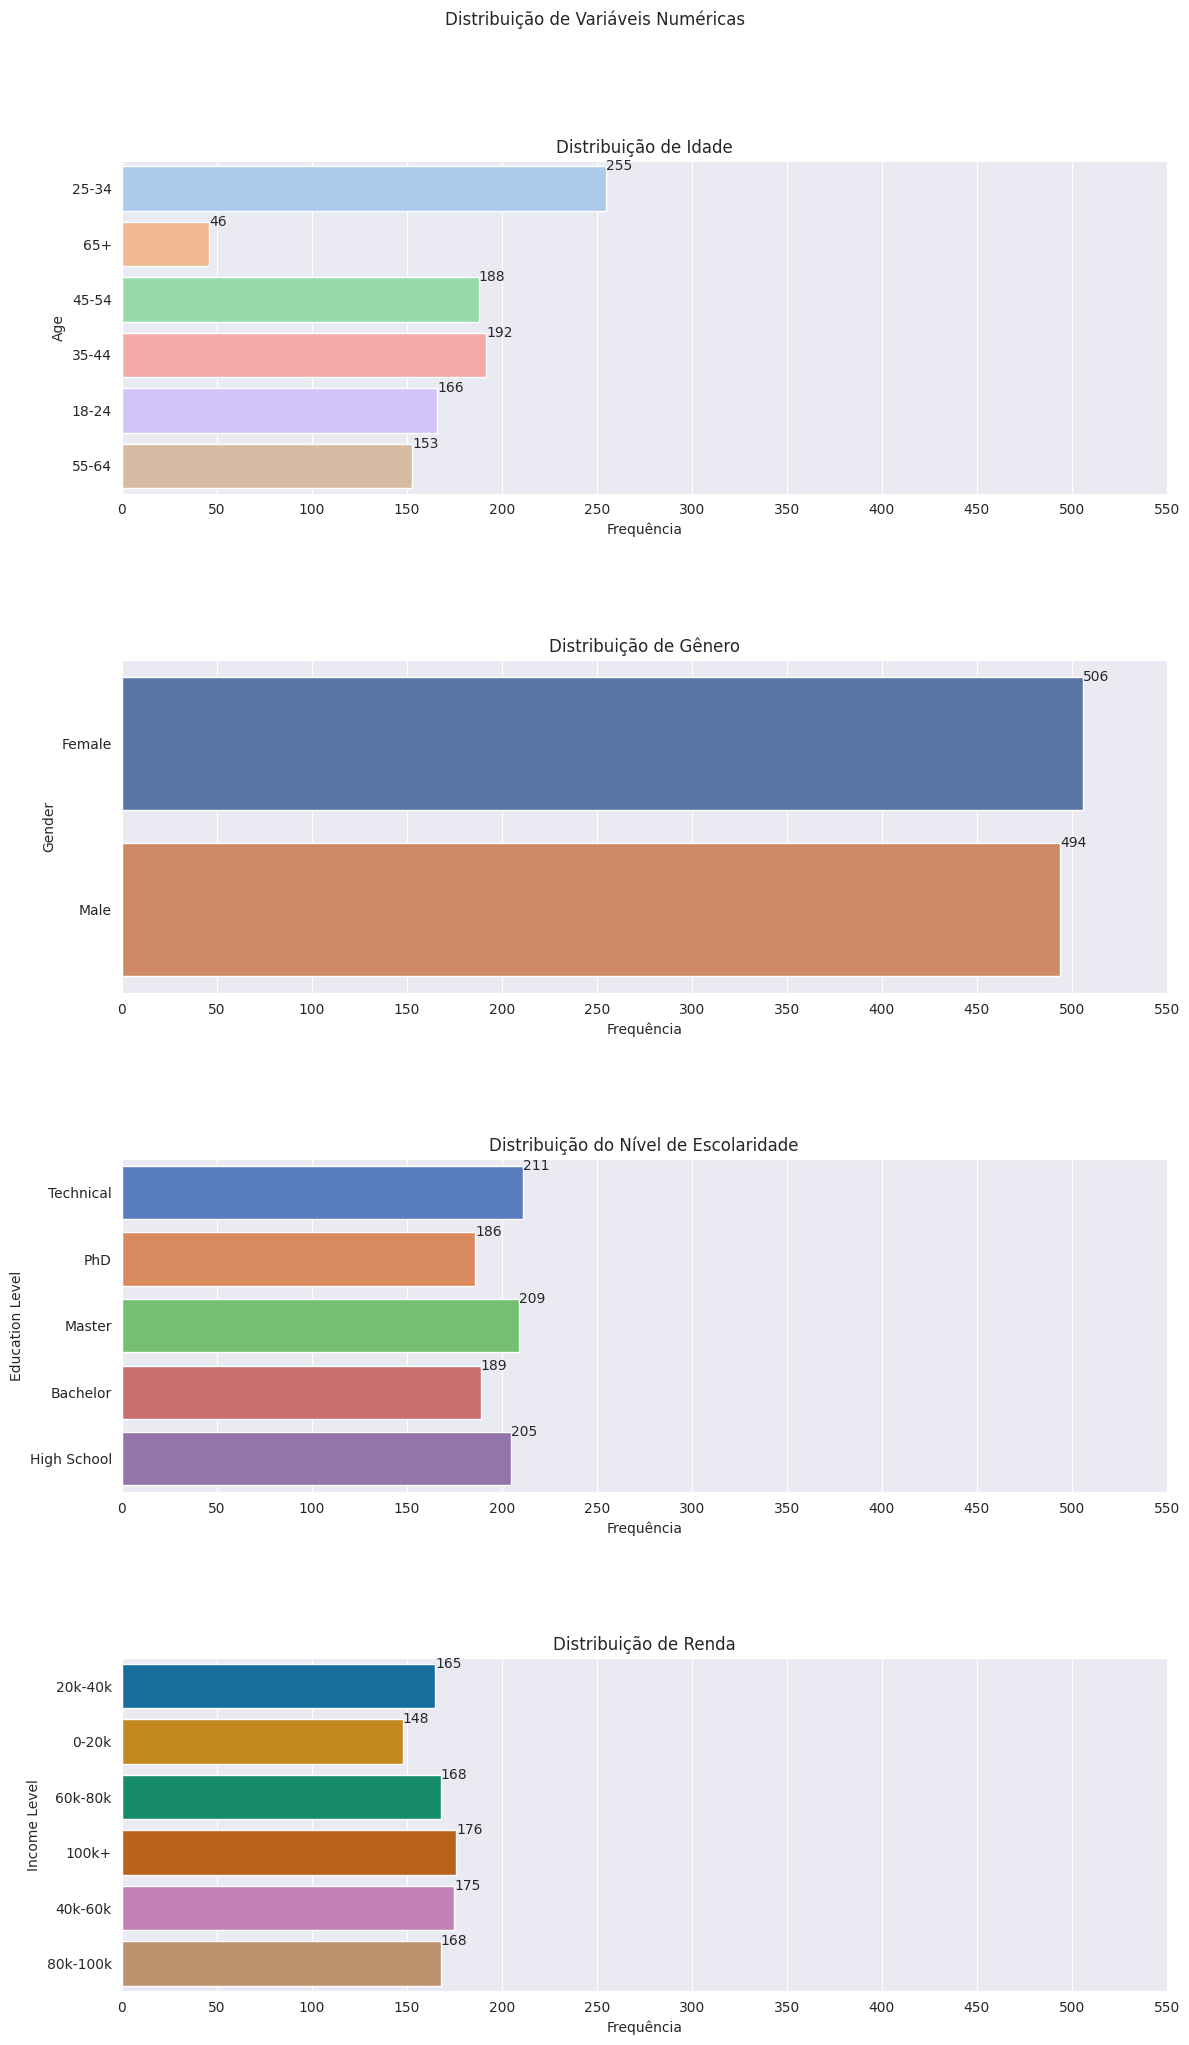

In [12]:
#configurando a estética dos gráficos
sns.set_style('darkgrid')

#criando subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 20))

fig.suptitle('Distribuição de Variáveis Numéricas', y=1.02)

#configuração dos limites e intervalos do eixo x
x_lim = 550
x_ticks = range(0, x_lim + 50, 50)

#plotagem da distribuição de idade
sns.countplot(ax=axs[0], y='Age', data=data, palette='pastel', orient='h')
axs[0].set_title('Distribuição de Idade')
axs[0].set_xlabel('Frequência')

axs[0].set_xlim(0, x_lim)
axs[0].set_xticks(x_ticks)

for p in axs[0].patches:
    axs[0].annotate(f'{p.get_width():.0f}', (p.get_x() + p.get_width(), p.get_y()), ha='left', va='center')

#plotagem da distribuição de gênero
sns.countplot(ax=axs[1], y='Gender', data=data, palette='deep', orient='h')
axs[1].set_title('Distribuição de Gênero')
axs[1].set_xlabel('Frequência')

axs[1].set_xlim(0, x_lim)
axs[1].set_xticks(x_ticks)

for p in axs[1].patches:
    axs[1].annotate(f'{p.get_width():.0f}', (p.get_x() + p.get_width(), p.get_y()), ha='left', va='center')

#plotagem da distribuição do nível de escolaridade
sns.countplot(ax=axs[2], y='Education Level', data=data, palette='muted', orient='h')
axs[2].set_title('Distribuição do Nível de Escolaridade')
axs[2].set_xlabel('Frequência')

axs[2].set_xlim(0, x_lim)
axs[2].set_xticks(x_ticks)

for p in axs[2].patches:
    axs[2].annotate(f'{p.get_width():.0f}', (p.get_x() + p.get_width(), p.get_y()), ha='left', va='center')

#plotagem da distribuição de renda
sns.countplot(ax=axs[3], y='Income Level', data=data, palette='colorblind', orient='h')
axs[3].set_title('Distribuição de Renda')
axs[3].set_xlabel('Frequência')

axs[3].set_xlim(0, x_lim)
axs[3].set_xticks(x_ticks)

for p in axs[3].patches:
    axs[3].annotate(f'{p.get_width():.0f}', (p.get_x() + p.get_width(), p.get_y()), ha='left', va='center')

#ajustando o layout
plt.tight_layout(rect=[0,0,1,0.98])
plt.subplots_adjust(hspace=0.5)

#exibindo o gráfico
plt.show()


Agora vamos examinar o padrão de uso dos dispositivos para entender quais são os principais meios utilizados para acessar a plataforma.
Essas informações serão importantes para otimizar os formatos de anúncios e canais de distribuição.
Vamos explorar também o comportamento online dos usuários, incluindo o nível de engajamento com conteúdos e anúncios, identificando os interesses mais comuns entre eles.

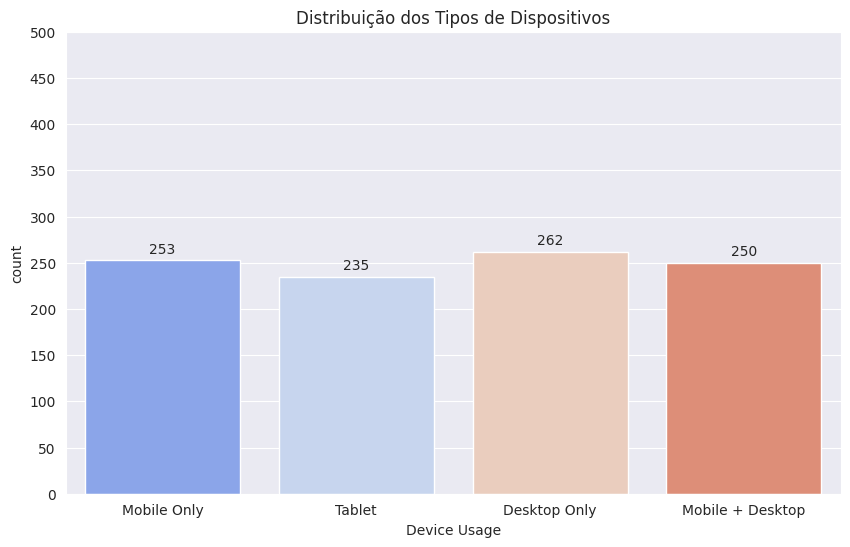

In [13]:
#distribuição do tipo de dispositivo
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Device Usage', data=data, palette='coolwarm')
ax.set_title('Distribuição dos Tipos de Dispositivos')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', xytext=(0,5), textcoords='offset points')
plt.ylim( 0,500)
plt.yticks(range(0, 501, 50))
plt.show()

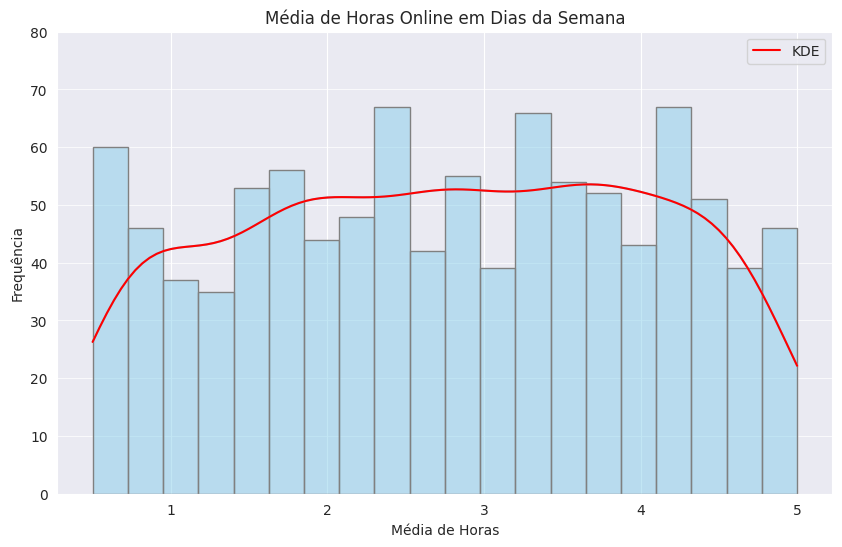

In [14]:
#analisando a média de horas gastas online em dias úteis


def histograma(data, column_name, bins, ylimit=80):

  #criando o histograma
  plt.figure(figsize=(10, 6))
  sns.histplot(data[column_name], bins=bins, kde=True, color='skyblue', edgecolor='gray', alpha=0.5)
  plt.ylim(0, ylimit)
  plt.yticks(range(0, ylimit + 1, 10))


  #calculando a estimativa de densidade de kernel
  kde = gaussian_kde(data[column_name])
  x = np.linspace(min(data[column_name]), max(data[column_name]), 100)
  plt.plot(x, kde(x) * len(data[column_name]) * (max(data[column_name]) - min(data[column_name]))/bins, color='red', label='KDE')

  #adicionando títulos e legenda
  plt.title('Média de Horas Online em Dias da Semana')
  plt.xlabel('Média de Horas')
  plt.ylabel('Frequência')
  plt.grid(axis='y', alpha=0.75)
  plt.legend()

  #exibindo o histograma
  plt.show()

#chamando a função
histograma(data, 'Time Spent Online (hrs/weekday)', bins=20)



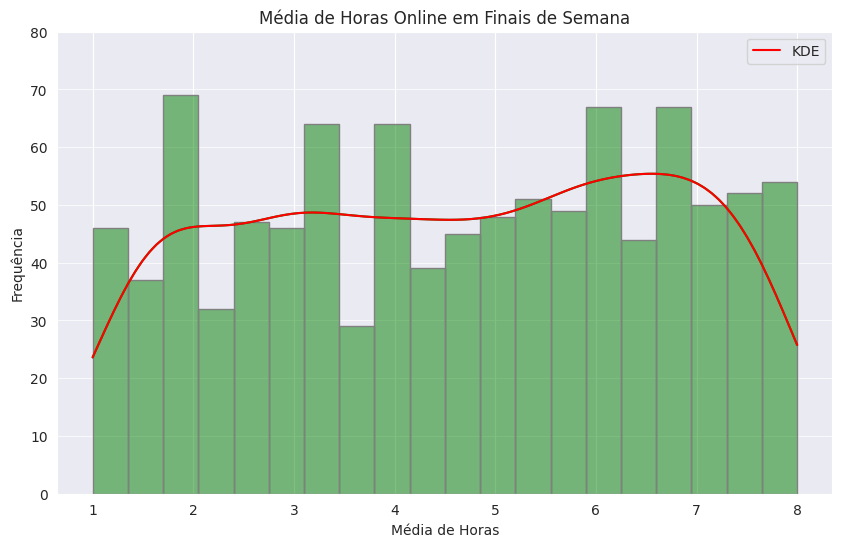

In [15]:
#analisando a média de horas gastas online em dias da semana

def histograma(data, column_name, bins, ylimit=80):

  #criando o histograma
  plt.figure(figsize=(10, 6))
  sns.histplot(data[column_name], bins=bins, kde=True, color='green', edgecolor='gray', alpha=0.5)
  plt.ylim(0, ylimit)
  plt.yticks(range(0, ylimit + 1, 10))


  #calculando a estimativa de densidade de kernel
  kde = gaussian_kde(data[column_name])
  x = np.linspace(min(data[column_name]), max(data[column_name]), 100)
  plt.plot(x, kde(x) * len(data[column_name]) * (max(data[column_name]) - min(data[column_name]))/bins, color='red', label='KDE')

  #adicionando títulos e legenda
  plt.title('Média de Horas Online em Finais de Semana')
  plt.xlabel('Média de Horas')
  plt.ylabel('Frequência')
  plt.grid(axis='y', alpha=0.75)
  plt.legend()

  #exibindo o histograma
  plt.show()

#chamando a função
histograma(data, 'Time Spent Online (hrs/weekend)', bins=20)

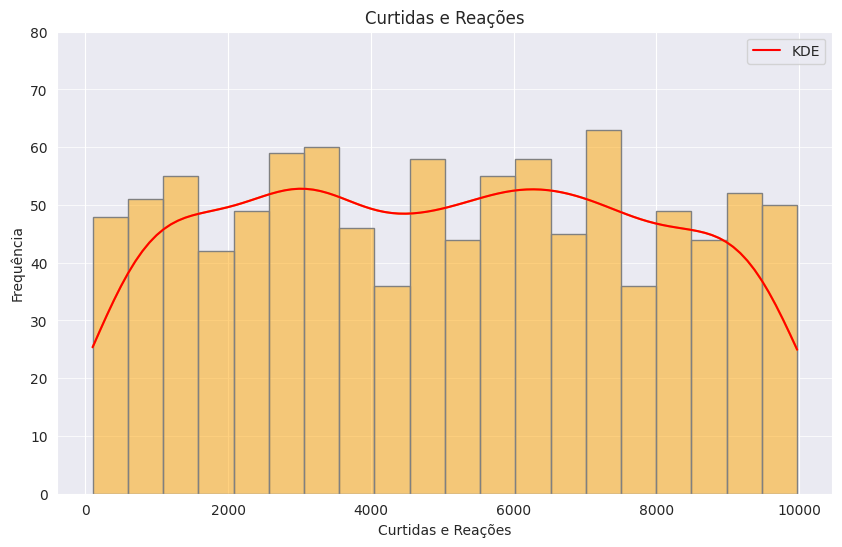

In [16]:
#Analisando número de curtidas e reações dos usuários


def histograma(data, column_name, bins, ylimit=80):

  #criando o histograma
  plt.figure(figsize=(10, 6))
  sns.histplot(data[column_name], bins=bins, kde=True, color='orange', edgecolor='gray', alpha=0.5)
  plt.ylim(0, ylimit)
  plt.yticks(range(0, ylimit + 1, 10))


  #calculando a estimativa de densidade de kernel
  kde = gaussian_kde(data[column_name])
  x = np.linspace(min(data[column_name]), max(data[column_name]), 100)
  plt.plot(x, kde(x) * len(data[column_name]) * (max(data[column_name]) - min(data[column_name]))/bins, color='red', label='KDE')

  #adicionando títulos e legenda
  plt.title('Curtidas e Reações')
  plt.xlabel('Curtidas e Reações')
  plt.ylabel('Frequência')
  plt.grid(axis='y', alpha=0.75)
  plt.legend()

  #exibindo o histograma
  plt.show()

#chamando a função
histograma(data, 'Likes and Reactions', bins=20)


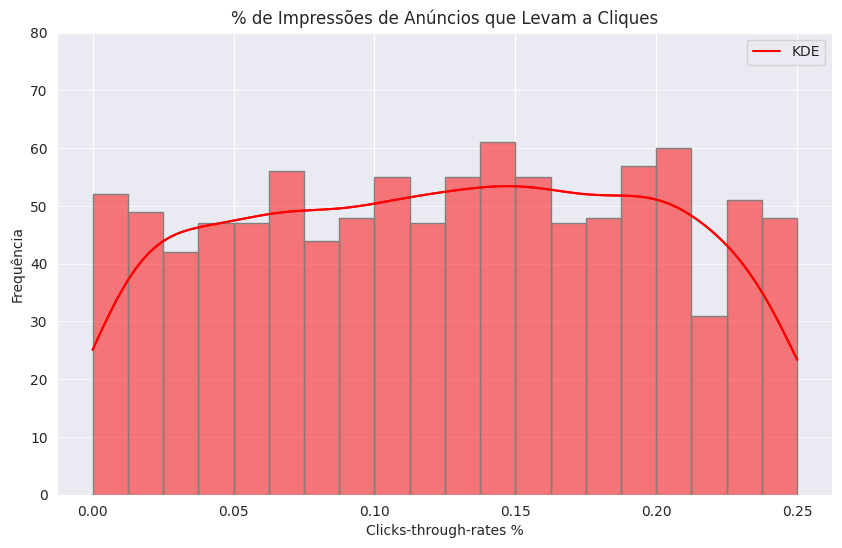

In [17]:
#analisando a porcentagem de impressões de anúncios que levam a cliques

def histograma(data, column_name, bins, ylimit=80):

  #criando o histograma
  plt.figure(figsize=(10, 6))
  sns.histplot(data[column_name], bins=bins, kde=True, color='red', edgecolor='gray', alpha=0.5)
  plt.ylim(0, ylimit)
  plt.yticks(range(0, ylimit + 1, 10))


  #calculando a estimativa de densidade de kernel
  kde = gaussian_kde(data[column_name])
  x = np.linspace(min(data[column_name]), max(data[column_name]), 100)
  plt.plot(x, kde(x) * len(data[column_name]) * (max(data[column_name]) - min(data[column_name]))/bins, color='red', label='KDE')

  #adicionando títulos e legenda
  plt.title('% de Impressões de Anúncios que Levam a Cliques')
  plt.xlabel('Clicks-through-rates %')
  plt.ylabel('Frequência')
  plt.grid(axis='y', alpha=0.75)
  plt.legend()

  #exibindo o histograma
  plt.show()

#chamando a função
histograma(data, 'Click-Through Rates (CTR)', bins=20)

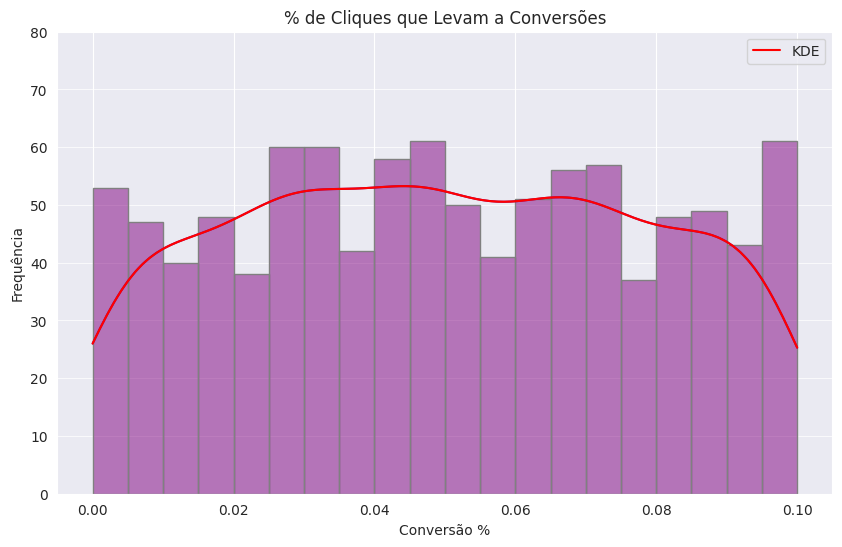

In [18]:
#analisando a porcentagem de cliques que levam a conversões

def histograma(data, column_name, bins, ylimit=80):

  #criando o histograma
  plt.figure(figsize=(10, 6))
  sns.histplot(data[column_name], bins=bins, kde=True, color='purple', edgecolor='gray', alpha=0.5)
  plt.ylim(0, ylimit)
  plt.yticks(range(0, ylimit + 1, 10))


  #calculando a estimativa de densidade de kernel
  kde = gaussian_kde(data[column_name])
  x = np.linspace(min(data[column_name]), max(data[column_name]), 100)
  plt.plot(x, kde(x) * len(data[column_name]) * (max(data[column_name]) - min(data[column_name]))/bins, color='red', label='KDE')

  #adicionando títulos e legenda
  plt.title('% de Cliques que Levam a Conversões')
  plt.xlabel('Conversão %')
  plt.ylabel('Frequência')
  plt.grid(axis='y', alpha=0.75)
  plt.legend()

  #exibindo o histograma
  plt.show()

#chamando a função
histograma(data, 'Conversion Rates', bins=20)

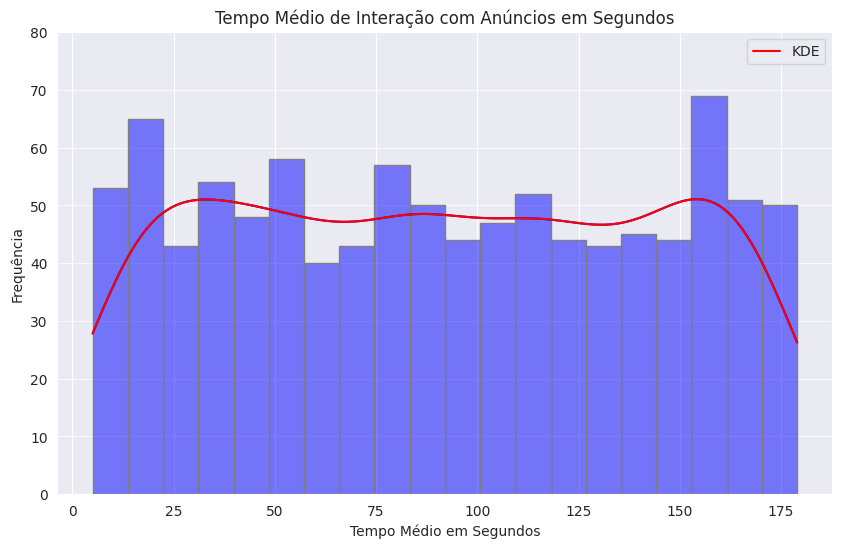

In [19]:
#analisando o tempo médio gasto interagindo com anúncios em segundos

def histograma(data, column_name, bins, ylimit=80):

  #criando o histograma
  plt.figure(figsize=(10, 6))
  sns.histplot(data[column_name], bins=bins, kde=True, color='blue', edgecolor='gray', alpha=0.5)
  plt.ylim(0, ylimit)
  plt.yticks(range(0, ylimit + 1, 10))


  #calculando a estimativa de densidade de kernel
  kde = gaussian_kde(data[column_name])
  x = np.linspace(min(data[column_name]), max(data[column_name]), 100)
  plt.plot(x, kde(x) * len(data[column_name]) * (max(data[column_name]) - min(data[column_name]))/bins, color='red', label='KDE')

  #adicionando títulos e legenda
  plt.title('Tempo Médio de Interação com Anúncios em Segundos')
  plt.xlabel('Tempo Médio em Segundos')
  plt.ylabel('Frequência')
  plt.grid(axis='y', alpha=0.75)
  plt.legend()

  #exibindo o histograma
  plt.show()

#chamando a função
histograma(data, 'Ad Interaction Time (sec)', bins=20)

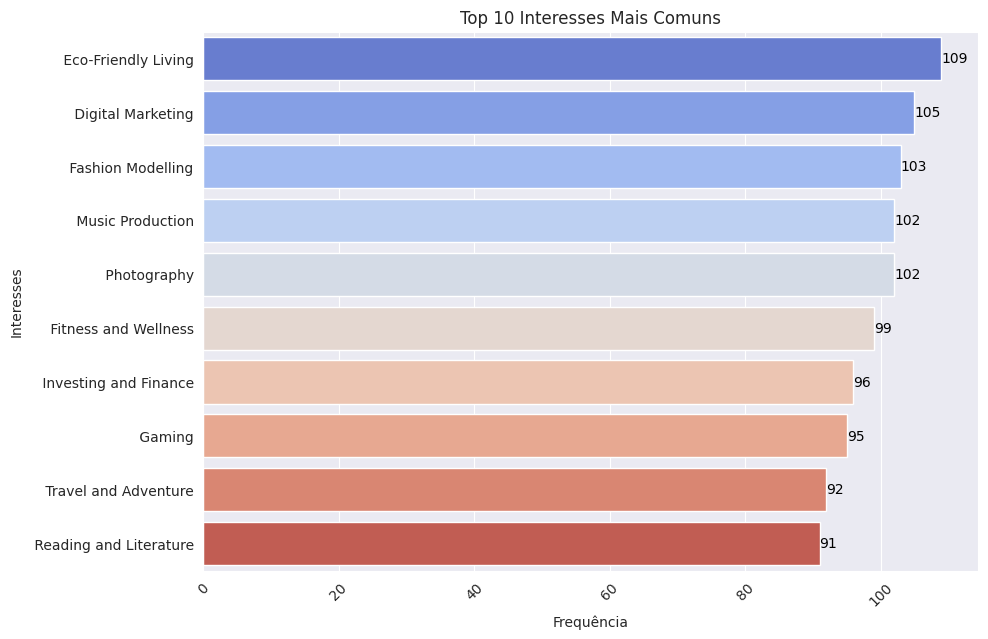

In [20]:
# Separando a coluna "Top Interests" e criando uma lista com todos os interesses
interesses_list = data['Top Interests'].str.split(',').sum()

# Contando a frequência de cada interesse
interesses_counter = Counter(interesses_list)

# Convertendo o objeto Counter em DataFrame corretamente
interesses_df = pd.DataFrame(interesses_counter.items(), columns=['Interests', 'Frequency'])

# Classificando pela frequência em ordem decrescente
interesses_df = interesses_df.sort_values(by='Frequency', ascending=False)

# Plotando os 10 interesses mais comuns
plt.figure(figsize=(10, 7))
sns.barplot(x='Frequency', y='Interests', data=interesses_df.head(10), palette='coolwarm')
plt.xticks(rotation=45)  # Para melhorar a visualização dos rótulos
plt.title('Top 10 Interesses Mais Comuns')
plt.xlabel('Frequência')
plt.ylabel('Interesses')
for index, value in enumerate(interesses_df.head(10)['Frequency']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')
plt.show()


# Modelo para Segmentação do Perfil do Usuário

In [21]:
#selecionando as características para serem utilizadas no clustering
features = ['Age', 'Gender', 'Income Level',
            'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
            'Likes and Reactions', 'Click-Through Rates (CTR)']


#separando as características que queremos separar para clustering
X = data[features]

#definindo o pré-processamento para características numérica e categóricas
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
                    'Likes and Reactions', 'Click-Through Rates (CTR)']


#usando standscaler para normalizar características numéricas
numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']

#usando onehotencoder para converter características categóricas em variáveis dummy
categorical_transformer = OneHotEncoder(drop='first')

#combinando as etapas de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), #aplicando transformação numérica
        ('cat', categorical_transformer, categorical_features) # aplicando transformação categórica
    ])

#criando um pipeline para pré-processamento e clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), #pré-processamento
    ('cluster', KMeans(n_clusters=5, random_state=42, init='k-means++'))]) #clustering com Kmeans

#treinando o pipeline
pipeline.fit(X)

#Obtendo os rótulos de cluster gerados pelo modelo Kmeans
cluster_labels = pipeline.named_steps['cluster'].labels_
#adicionando os rótulos de cluster ao dataframe original
data['Cluster'] = cluster_labels

display(data.head(30))


,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,1
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,4
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,4
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",4
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",1
5,6,25-34,Female,Suburban,Hindi,Master,6203,257,Mobile + Desktop,3.8,3.3,0.209,0.048,44,100k+,"Gourmet Cooking, Software Engineering, Eco-Fri...",1
6,7,18-24,Female,Suburban,Hindi,Bachelor,1573,136,Mobile + Desktop,2.8,7.9,0.172,0.068,8,100k+,"Gardening, Digital Marketing, Music Production",3
7,8,55-64,Male,Suburban,Hindi,PhD,3343,272,Desktop Only,2.7,1.9,0.128,0.032,35,40k-60k,"Music Production, Photography, Gaming, Travel ...",1
8,9,45-54,Female,Urban,Spanish,High School,2281,49,Mobile + Desktop,1.0,3.2,0.115,0.008,159,20k-40k,"Eco-Friendly Living, Gardening",2
9,10,45-54,Male,Rural,Hindi,Bachelor,9741,421,Mobile + Desktop,2.3,4.4,0.161,0.058,157,100k+,"Digital Marketing, Travel and Adventure",4


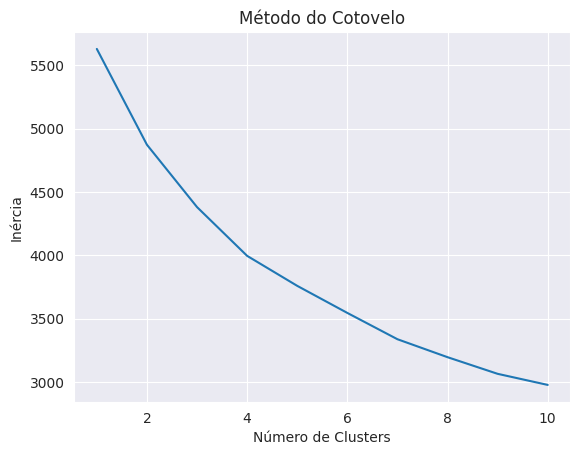

In [22]:
#verificando se a quantidade de clusters foi adequada com o "Elbow Method"(método do cotovelo)
inercia = []
cluster_range = range(1, 11)  # Testando de 1 a 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(preprocessor.fit_transform(X))  # Pré-processando os dados
    inercia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.plot(cluster_range, inercia)
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


In [23]:
#agrupa os dados pelo valor de 'Cluster' e calcula a média de cada uma das colunas numéricas
cluster_means = data.groupby('Cluster')[numeric_features].mean().round(2)

cluster_means = cluster_means.reset_index()

#para cada variável categórica, calcula a moda (valor mais frequente) dentro de cada cluster
mode_series = data.groupby('Cluster')[features].agg(lambda x: x.mode()[0])

#adiciona a moda da característica categórica correspondente à tabela de médias do cluster
cluster_means[features] = mode_series

#exibe a tabela de médias do cluster
display(cluster_means)

,Cluster,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Age,Gender,Income Level
0,0,4.5,5.8,278,0.005,45-54,Male,60k-80k
1,1,3.8,1.7,645,0.161,45-54,Male,20k-40k
2,2,0.8,1.1,3540,0.045,25-34,Female,0-20k
3,3,1.0,4.9,1001,0.165,25-34,Female,80k-100k
4,4,3.5,6.9,6356,0.054,25-34,Female,100k+


# Visualização dos Segmentos de Usuários

In [24]:
features_to_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
                    'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_to_plot)

radar_df = cluster_means[features_to_plot].reset_index()


In [33]:
# Normalizando os dados para garantir que as escalas fiquem entre 0 e 1
radar_df_normalized = (radar_df[features_to_plot] - radar_df[features_to_plot].min()) / (radar_df[features_to_plot].max() - radar_df[features_to_plot].min())

# Nomes dos segmentos (grupos de usuários) correspondentes aos clusters
segment_names = ['Usuários Discretos', 'Usuários de Fim de Semana', 'Usuários Engajados', 'Exploradores Ativos', 'Usuários Casuais']

# Cores para cada segmento
colors = ['blue', 'red', 'green', 'purple', 'orange']

# Criando subplots, com 2 colunas e 3 linhas (ajuste conforme o número de segmentos)
rows = 3
cols = 2
fig = make_subplots(rows=3, cols=2, specs=[[{'type': 'polar'}, {'type': 'polar'}],
                                           [{'type': 'polar'}, {'type': 'polar'}],
                                           [{'type': 'polar', 'colspan': 2}, None]])  # O último gráfico ocupa toda a largura

# Definindo a escala radial comum
radiallimit_range = [0, 1]

# Loop para gerar gráficos de radar individuais para cada segmento e adicionar aos subplots
for i, segment in enumerate(segment_names):
    row = (i // cols) + 1  # Determina a linha atual
    col = (i % cols) + 1   # Determina a coluna atual

    fig.add_trace(go.Scatterpolar(
        r=radar_df_normalized.iloc[i][features_to_plot].values.tolist() + [radar_df_normalized.iloc[i][features_to_plot].values[0]],  # Fechando o gráfico com o primeiro valor no final
        theta=labels.tolist() + [labels[0]],  # Fechando a forma ao adicionar o primeiro rótulo no final
        fill='toself',  # Preenchendo a área dentro do radar
        name=segment,  # Nome do segmento (para a legenda)
        line_color=colors[i],  # Definindo a cor do segmento
        opacity=0.7,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])]
        + [f"{labels[0]}: {radar_df_normalized.iloc[i][features_to_plot][0]:.2f}"]  # Texto de hover para cada característica
    ), row=row, col=col)

# Aplicando a mesma escala para cada subplot de radar
for i in range(len(segment_names)):
    fig.update_layout(
        polar=dict(radialaxis=dict(range=radiallimit_range, dtick=0.2)),
    )


# Atualizando o layout para ajustar os subplots de radar
fig.update_layout(
    height=1000,  # Aumentando a altura total do gráfico
    width=1400,  # Aumentando a largura total do gráfico
    showlegend=True,  # Mostra a legenda
    title='Comparação dos Perfis de Segmentos de Usuários com Base em Métricas de Engajamento',  # Título geral do gráfico
    title_font_size=20,  # Tamanho da fonte do título
    legend=dict(
        title='Perfil do Segmento do Usuário',  # Título da legenda
        orientation='h',  # Orientação horizontal da legenda
        x=0.5,  # Centralizada na legenda
        y=1.02,  # Posicionando a legenda acima do gráfico
        xanchor="center",
        yanchor="top"
))

fig.update_layout(
    margin=dict(t=150, b=50, l=50, r=10),
    title_x=0.5
)

fig.show()

In [32]:
#Normalizando os dados para garantir que as escalas fiquem entre 0 e 1
radar_df_normalized = (radar_df[features_to_plot] - radar_df[features_to_plot].min()) / (radar_df[features_to_plot].max() - radar_df[features_to_plot].min())

#Nomes dos segmentos (grupos de usuários) correspondentes aos clusters
segment_names = ['Usuários Discretos', 'Usuários de Fim de Semana', 'Usuários Engajados', 'Exploradores Ativos', 'Usuários Casuais']

#Cores para cada segmento
colors = ['blue', 'red', 'green', 'purple', 'orange']

#Criando subplots, com 2 colunas e 3 linhas (ajuste conforme o número de segmentos)
rows = 3
cols = 2
fig = make_subplots(rows=3, cols=2, specs=[[{'type': 'polar'}, {'type': 'polar'}],
                                           [{'type': 'polar'}, {'type': 'polar'}],
                                           [{'type': 'polar', 'colspan': 2}, None]])

#Definindo a escala radial comum
radiallimit_range = [0, 1]

#Criando a figura
fig = go.Figure()

#Adicionando cada segmento ao gráfico
for i, segment in enumerate(segment_names):
    hover_text = [f"{label}: {value:.2f}" for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])]
    hover_text.append(f"{labels[0]}: {radar_df_normalized.iloc[i][features_to_plot][0]:.2f}")

    fig.add_trace(go.Scatterpolar(
        r=radar_df_normalized.iloc[i][features_to_plot].values.tolist() + [radar_df_normalized.iloc[i][features_to_plot].values[0]],  # Fecha o gráfico
        theta=labels.tolist() + [labels[0]],  # Fecha a forma
        fill='toself',
        name=segment,
        line=dict(color=colors[i], width=2),
        opacity=0.7,  # Torna o gráfico mais transparente para evitar poluição visual
        hoverinfo='text',
        text=hover_text
    ))

# Ajustando o layout
fig.update_layout(
    polar=dict(radialaxis=dict(range=[0, 1], dtick=0.2)),  # Mantendo a escala fixa de 0 a 1
    title="Comparação dos Perfis de Segmentos de Usuários",
    title_x=0.5,
    showlegend=True,
    width=1000, height=800,  # Ajuste do tamanho do gráfico
    legend=dict(
        title="Segmentos",
        x=0.5, y=-0.1, orientation="h", xanchor="center"
    )
)

# Exibir o gráfico
fig.show()